In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
%cd /Users/guchunhui/Documents/cgvae
%pwd

/Users/guchunhui/Documents/cgvae


/Users/guchunhui/opt/anaconda3/envs/cgvae/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/guchunhui/Documents/cgvae'

In [27]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/results2.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df = pd.concat(data, ignore_index=True)

# Convert the DataFrame to a CSV file
# df.to_csv('results.csv', index=False)

/var/folders/vx/43t39d2x5rq3c_gh_5hsw01r0000gn/T/ipykernel_34050/1284768679.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/vx/43t39d2x5rq3c_gh_5hsw01r0000gn/T/ipykernel_34050/1284768679.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/vx/43t39d2x5rq3c_gh_5hsw01r0000gn/T/ipykernel_34050/1284768679.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/vx/43t39d2x5rq3c_gh_5hsw01r0000gn/T/ipykernel_34050/1284768679.py:5: FutureWarning: Passing lite

In [28]:
df

,dataset,split_ratio,seed,AUC,AP,best_epochs,learning_rate,regularization,neg_sample_ratio,false_pos_edge_ratio,execution_time
0,Cora,0.5,36,0.6349,0.6706,172,0.005,0,1,0.5,9.85
1,Cora,0.5,37,0.6949,0.7266,277,0.005,0,1,0.5,11.62
2,Cora,0.5,38,0.5963,0.6181,176,0.005,0,1,0.5,9.24
3,Cora,0.5,36,0.6336,0.6690,173,0.005,1,1,0.5,8.83
4,Cora,0.5,37,0.6928,0.7242,277,0.005,1,1,0.5,11.62
5,Cora,0.5,38,0.5993,0.6228,177,0.005,1,1,0.5,8.86
6,Cora,0.5,36,0.6336,0.6686,184,0.005,10,1,0.5,9.59
7,Cora,0.5,37,0.6224,0.6672,131,0.005,10,1,0.5,8.31
8,Cora,0.5,38,0.6030,0.6221,182,0.005,10,1,0.5,9.13
9,Cora,0.5,36,0.6591,0.6904,485,0.005,100,1,0.5,16.81


In [29]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio', 'regularization']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})
# ungroup the index
df_agg = df_agg.reset_index()

In [30]:
df_agg[df_agg['dataset'] == 'Cora'].sort_values(by=['split_ratio', 'regularization'], ascending=False)

dataset split_ratio regularization       AUC                  AP          
                                          mean       std      mean       std
5    Cora         0.5          10000  0.605367  0.014908  0.623667  0.016935
4    Cora         0.5           1000  0.625300  0.011166  0.649167  0.005361
3    Cora         0.5            100  0.639633  0.016977  0.669133  0.026823
2    Cora         0.5             10  0.619667  0.015482  0.652633  0.026452
1    Cora         0.5              1  0.641900  0.047299  0.672000  0.050767
0    Cora         0.5              0  0.642033  0.049686  0.671767  0.054259

# plot AUC for each dataset and each split_ratio, with regularization in x-axis



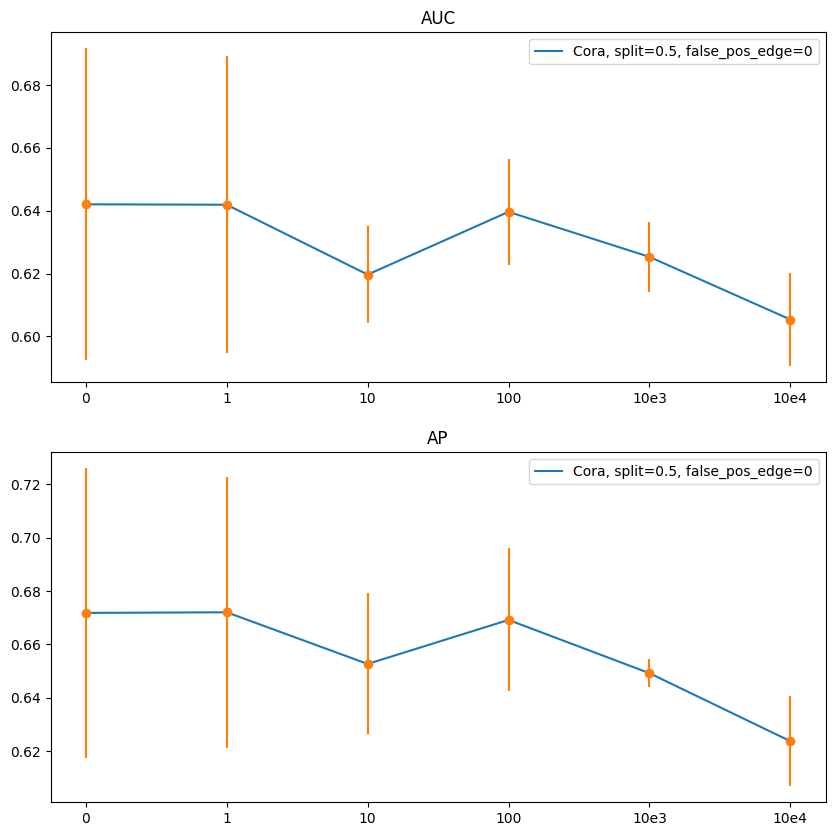

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
# plot different line for different regularization
# axis 0 plot for AUC
ax[0].plot([0, 1, 2, 3, 4, 5],
           df_agg[(df_agg['dataset'] == 'Cora')]['AUC']['mean'], label='Cora, split=0.5, false_pos_edge=0')
# plot error bar
ax[0].errorbar([0, 1, 2, 3, 4, 5],
               df_agg[(df_agg['dataset'] == 'Cora')]['AUC']['mean'],
               yerr=df_agg[(df_agg['dataset'] == 'Cora')]['AUC']['std'], fmt='o')
# x-axis ticks as 0, 1 10, 100, 1000, 10000
ax[0].set_xticks([0, 1, 2, 3, 4, 5], labels=['0', '1', '10', '100', '10e3', '10e4'])
# x-axis label
ax[0].xlabel = 'Regularization'
# title
ax[0].set_title('AUC')
# legend
ax[0].legend()
# plot AP
ax[1].plot([0, 1, 2, 3, 4, 5],
           df_agg[(df_agg['dataset'] == 'Cora')]['AP']['mean'], label='Cora, split=0.5, false_pos_edge=0')
# plot error bar
ax[1].errorbar([0, 1, 2, 3, 4, 5],
               df_agg[(df_agg['dataset'] == 'Cora')]['AP']['mean'],
               yerr=df_agg[(df_agg['dataset'] == 'Cora')]['AP']['std'], fmt='o')
ax[1].set_xticks([0, 1, 2, 3, 4, 5], labels=['0', '1', '10', '100', '10e3', '10e4'])
# x-axis label
ax[1].xlabel = 'Regularization'
# title
ax[1].set_title('AP')
# legend
ax[1].legend()

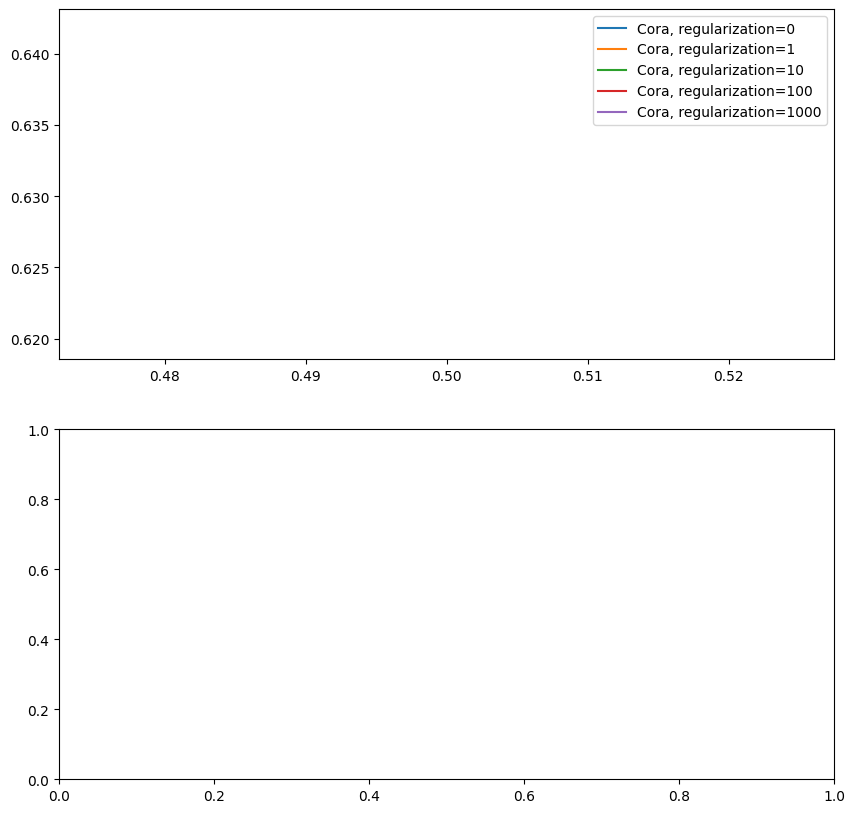

In [32]:
# plot lineplot for AUC and AP for each dataset and split_ratio
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
# plot different line for different regularization
# axis 0 plot for AUC
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 0)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 0)]['AUC']['mean'], label='Cora, '
                                                                                                          'regularization=0')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1)]['split_ratio'], 
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1)]['AUC']['mean'], label='Cora, '
                                                                                                         'regularization=1')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 10)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 10)]['AUC']['mean'], label='Cora, '
                                                                                                         'regularization=10')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 100)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 100)]['AUC']['mean'], label='Cora, '
                                                                                                          'regularization=100')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1000)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1000)]['AUC']['mean'], label='Cora, '
                                                                                                           'regularization=1000')
# add legend
ax[0].legend()


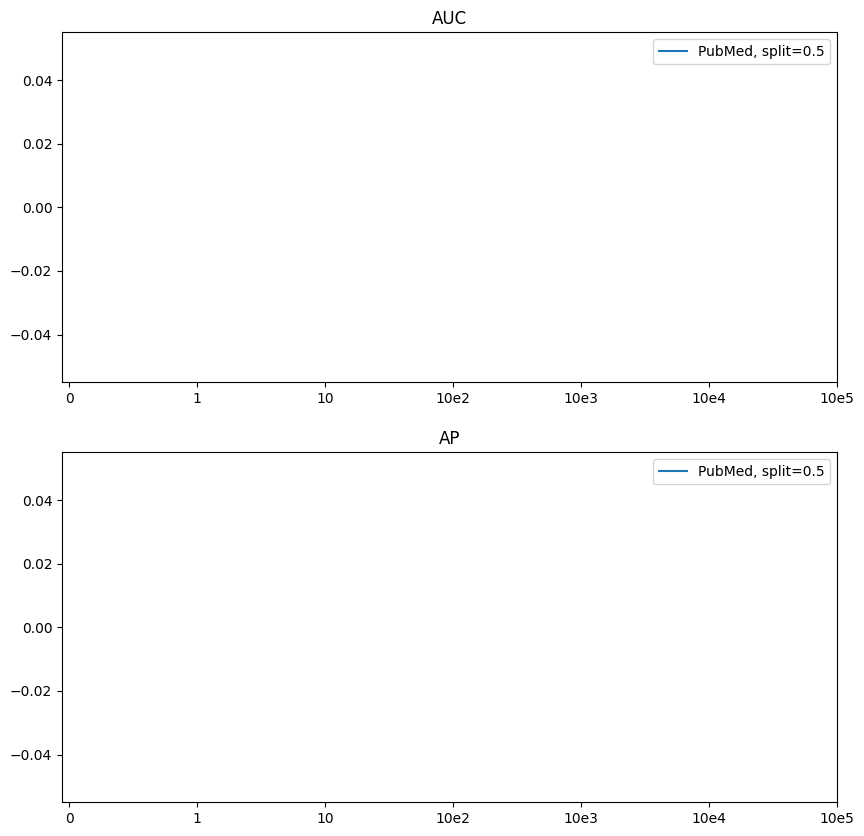

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
# plot different line for different regularization
# axis 0 plot for AUC
ax[0].plot(np.log10(df_agg[(df_agg['dataset'] == 'PubMed')]['regularization']),
           df_agg[(df_agg['dataset'] == 'PubMed')]['AUC']['mean'], label='PubMed, split=0.5')
# plot error bar
ax[0].errorbar(np.log10(df_agg[(df_agg['dataset'] == 'PubMed')]['regularization']),
               df_agg[(df_agg['dataset'] == 'PubMed')]['AUC']['mean'],
               yerr=df_agg[(df_agg['dataset'] == 'PubMed')]['AUC']['std'], fmt='o')
# x-axis ticks as 0, 1 10, 100, 1000, 10000
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6],
                 labels=['0', '1', '10', '10e2', '10e3', '10e4', '10e5'])
# x-axis label
ax[0].xlabel = 'Regularization'
# title
ax[0].set_title('AUC')
# legend
ax[0].legend()
# plot AP
ax[1].plot(np.log10(df_agg[(df_agg['dataset'] == 'PubMed')]['regularization']),
           df_agg[(df_agg['dataset'] == 'PubMed')]['AP']['mean'], label='PubMed, '
                                                                      'split=0.5')
# plot error bar
ax[1].errorbar(np.log10(df_agg[(df_agg['dataset'] == 'PubMed')]['regularization']),
               df_agg[(df_agg['dataset'] == 'PubMed')]['AP']['mean'],
               yerr=df_agg[(df_agg['dataset'] == 'PubMed')]['AP']['std'], fmt='o')
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6],
                 labels=['0', '1', '10', '10e2', '10e3', '10e4', '10e5'])
# x-axis label
ax[1].xlabel = 'Regularization'
# title
ax[1].set_title('AP')
# legend
ax[1].legend()